<a href="https://colab.research.google.com/github/hossamhamdy333/AI-Projects-Portfolio/blob/main/machine-learning-projects/diabetes-prediction/diabetes%20prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hossamhamdy333/AI-Projects-Portfolio.git
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import  Path
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import RobustScaler # less sensitive to outliers
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression,Ridge,Lasso,ElasticNet
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeClassifier
#from catboost import CatBoostRegressor
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score,roc_curve, classification_report, confusion_matrix
from sklearn.model_selection import cross_validate, GridSearchCV
import warnings
warnings.filterwarnings('ignore')


Cloning into 'AI-Projects-Portfolio'...
remote: Enumerating objects: 124, done.
remote: Counting objects: 100% (124/124), done.
remote: Compressing objects: 100% (103/103), done.
remote: Total 124 (delta 27), reused 71 (delta 6), pack-reused 0 (from 0)
Receiving objects: 100% (124/124), 2.63 MiB | 14.50 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
# function to save figures of this project

image_path= Path() / "images" /"project_1_diabetes"
image_path.mkdir(parents=True,exist_ok=True)
def save_figure(fig_id,tight_layout=True,fig_extension="png",resolution=300):
    path=image_path /f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout(pad=2)
    plt.savefig(path,format=fig_extension,dpi=resolution)

In [ ]:
data=pd.read_csv(r"C:\Users\lenovo\Desktop\Projects_AI\project_1_diabetes\diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# take a copy of the origanal data
#,for exploration and visualization
data_copied=data.copy()

In [ ]:
# EDA infornation about the data
def check_data(data,size=5):
      # fuction takes the data
      #***********
      # returns information about it
   print(f"informations about the data:\n{data.info()}")
   print(f"shape of the data:\n{data.shape}\n"
         f"size of the data:\n{data.size}\n"#nrows*ncols
         f"dimension of the data:\n{data.ndim}\n")
   print(f"type of the data:\n{data.dtypes}\n")
   print(f"head of the data:\n{data.head(size)}\n")
   print(f"tail of the data:\n{data.tail(size)}\n")
   print(f"random sample from the data:\n {data.sample(size)}\n")
   print(f"number of missing values in each feature:\n{data.isnull().sum()}\n")
   print(f"total number of misssing values:\n{data.isnull().sum().sum()}\n"
         f"persentage of missing values:\n{data.isnull().mean()*100}\n")
   print(f"numpur of duplicated rows:\n{data.duplicated().sum()}\n")
   print(f"number of unique values in each feature:\n{data.nunique()}\n")
   print(f"data describtion:\n{data.describe().T}\n")




In [ ]:
check_data(data_copied)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
informations about the data:
None
shape of the data:
(768, 9)
size of the data:
6912
dimension of the data:
2

type of the data:
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
Ski

In [ ]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [ ]:
# getting the kind of each feature
def info_features(data,catagorical_th=10,cardinal_th=20,print_result=True):
    #function takes the data,cat_th=10(set it as you want),car_th=20,print_result=True (set it as you want)
    #********
    #returns cat cols,num cols, cat but car cols(cardinal feature has a large number unique values)
    cat_cols=[col for col in data.columns if str(data[col].dtypes) in ['category','object','bool']]
    num_but_cat=[col for col in data.columns if data[col].nunique()<10 and data[col].dtypes in ["int","float"]]
    cat_but_car=[col for col in data.columns if data[col].nunique()>20 and str(data[col].dtypes) in ["catagory","object"]]
    cat_cols=[col for col in cat_cols if col not in cat_but_car]
    cat_cols=cat_cols+num_but_cat
    num_cols=[col for col in data.columns if data[col].dtypes in ['int',"float"] ]


    num_cols=[col for col in num_cols if col not in cat_cols]

    if print_result:
        print(f'number of instaces {data.shape[0]}')
        print(f'faetures:  {data.shape[1]}')
        print(f'cat_cols:  {len(cat_cols)}')

        print(f'num_cols:  {len(num_cols)}')
        print(f'cat_but_car:  {len(cat_but_car)}')
        print(f'num_but_cat:  {len(num_but_cat)}')

    return cat_cols, num_cols, cat_but_car

In [ ]:
cat_cols,num_cols,cat_but_car=info_features(data_copied)


number of instaces 768
faetures:  9
cat_cols:  1
num_cols:  8
cat_but_car:  0
num_but_cat:  1


In [ ]:
cat_cols,num_cols

(['Outcome'],
 ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age'])

In [ ]:
def check_missing_values(data, na_name=False):
    # columns that contain missing values
    na_columns = [col for col in data.columns if data[col].isnull().sum() > 0]

    # number of missing values per column
    n_miss = data[na_columns].isnull().sum().sort_values(ascending=False)

    # ratio of missing values per column
    ratio = (data[na_columns].isnull().mean() * 100).sort_values(ascending=False)

    # create df combining both
    missing_df = pd.concat([n_miss, ratio.round(2)], axis=1, keys=['n_miss', 'ratio'])

    print(missing_df, end="\n\n")
    # if we want to print the df
    if na_name:
        return na_columns


In [ ]:
check_missing_values(data_copied,na_name=True)

Empty DataFrame
Columns: [n_miss, ratio]
Index: []



[]

In [ ]:
# having bmi value under 12 is not possible
# and also the zero values are not possible
(data_copied==0).sum()


Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [ ]:
# set zero assigned values to null
dict_missing=(data_copied==0).sum().to_dict()
missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in missing_value:
    print("number of missing values in each column")
    print(col ,dict_missing[col])
    data_copied[col]=np.where((data_copied[col]==0),np.nan,data_copied[col])

check_missing_values(data_copied)

number of missing values in each column
Glucose 5
number of missing values in each column
BloodPressure 35
number of missing values in each column
SkinThickness 227
number of missing values in each column
Insulin 374
number of missing values in each column
BMI 11
               n_miss  ratio
Insulin           374  48.70
SkinThickness     227  29.56
BloodPressure      35   4.56
BMI                11   1.43
Glucose             5   0.65



In [ ]:
#group-wise median imputation
data_copied=data_copied.fillna(data_copied.groupby("Outcome").transform("median"))
check_missing_values(data_copied)
data_copied.isnull().sum()

Empty DataFrame
Columns: [n_miss, ratio]
Index: []



Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
#2 outlier detection and handling
def outlier_thresholds(data,feature,low_quantile=0.10,up_quantile=0.90):
    # function  that idenify ranges in each future
    #takes the data and the feature
    quantile_lower=data[feature].quantile(low_quantile)
    quantile_upper = data[feature].quantile(up_quantile)
    interquantile_range = quantile_upper - quantile_lower
    up_limit = quantile_upper + 1.5 * interquantile_range
    low_limit = quantile_lower - 1.5 * interquantile_range
    return  low_limit, up_limit



In [ ]:
# function that checks outliers for each feature
def check_outlier(data,feature):
    low_limit, up_limit = outlier_thresholds(data, feature)
    if data[(data[feature] > up_limit) | (data[feature] < low_limit)].any(axis=None):
        return True
    else:
        return False

In [ ]:
for col in num_cols:
    print(col, check_outlier(data_copied, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness True
Insulin True
BMI False
DiabetesPedigreeFunction True
Age False


In [ ]:
# function that replaces the outliers of each feature
def replace_with_thresholds(data,feature):
    low_limit, up_limit = outlier_thresholds(data, feature)
    # cap values
    data.loc[(data[feature]< low_limit), feature] = low_limit
    data.loc[(data[feature] > up_limit), feature] = up_limit




In [ ]:
# iterate over each feature to remove outliers
for col in num_cols:
    print(col, replace_with_thresholds(data_copied, col))

Pregnancies None
Glucose None
BloodPressure None
SkinThickness None
Insulin None
BMI None
DiabetesPedigreeFunction None
Age None


In [ ]:
for col in num_cols:
    print(col, check_outlier(data_copied, col))

Pregnancies False
Glucose False
BloodPressure False
SkinThickness False
Insulin False
BMI False
DiabetesPedigreeFunction False
Age False


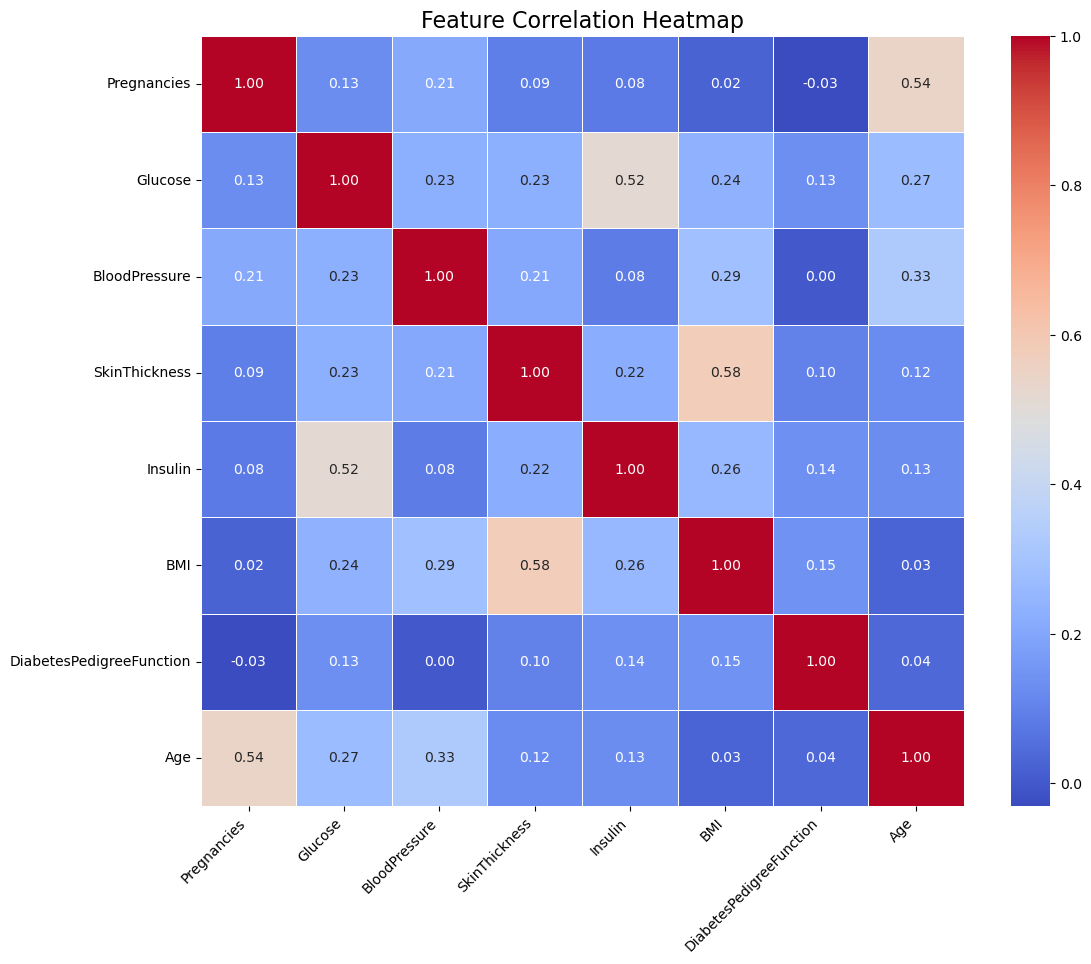

In [ ]:
#3 looking for correlations
corr = data_copied[num_cols].corr()
# Set figure size
plt.figure(figsize=(12, 10))
sns.heatmap(
    corr,
    cmap="coolwarm",       # better diverging colormap
    annot=True,            # show values
    fmt=".2f",             # 2 decimal places
    linewidths=0.5,        # lines between cells
    cbar=True              # show color bar
)

# Rotate labels for clarity
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)

# Add title
plt.title("Feature Correlation Heatmap", fontsize=16)

# Save the figure using your function
save_figure("correlations_between_features", resolution=300)
plt.show()



In [ ]:
#4 feature engineering and extraction

def feature_extraction(data):
    #discrete features out of contineuos ones
    data["Insulin_CAT"]=pd.cut(data["Insulin"],
                               bins=[0,140,199,np.inf],
                               labels=["Normal","Prediabetes","diabetes"])
    data['BloodPressure_CAT'] = pd.cut(data['BloodPressure'],
                                            bins=[0, 60, 80, 90, 120, np.inf],
                                            labels=["Low_Blood_Pressure", "Normal",
                                                    "Prehypertension", "Hypertension",
                                                    "Hypertensive_Crisis"])
    data['Glucose_CAT'] = pd.cut(data['Glucose'],
                                      bins=[0, 140, 199, np.inf],
                                      labels=["Normal", "Impaired_Glucose_Tolerance",
                                              "Diabetes"])
    data['BMI_CAT'] = pd.cut(data['BMI'],
                                  bins=[0, 18.5, 24.9, 29.9, 34.9, 39.9,  np.inf],
                                  labels=["Underweight", "Healthy", "Overweight",
                                          "Obese_Class1", "Obese_Class2", "Obese_Class3"])

    data['Age_CAT'] = pd.cut(data['Age'],
                                  bins=[20, 40, 60, np.inf],
                                  labels=["Adult", "Middle_Age_Adult", "Senior_Adult"])
    #new cat feature out of existing ones
    data.loc[(data["Age"]>40)
              & (data['BloodPressure_CAT'] == 'Hypertension')
              & ((data["BMI_CAT"] == "Overweight")
              | (data["BMI_CAT"] == "Obese_Class1")
              | (data["BMI_CAT"] == "Obese_Class2")
              | (data["BMI_CAT"] == "Obese_Class3")),"Life_Level_CAT"] ="At_Risk"
    data['Life_Level_CAT'].fillna('Not_Risk', inplace = True)#modifies data directly, does NOT return a new DataFrame.


In [ ]:
feature_extraction(data_copied)

In [ ]:
data_copied.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome', 'Insulin_CAT',
       'BloodPressure_CAT', 'Glucose_CAT', 'BMI_CAT', 'Age_CAT',
       'Life_Level_CAT'],
      dtype='object')

In [ ]:
def boxplot_for_outliers(data,data_set):
    a = 2
    b = 4
    c = 1
    results = []
    colors=[]

    palette_set3 = sns.color_palette("Set3",len(num_cols))
    for color in palette_set3.as_hex():
        colors.append(color)
    colour_num_cols = zip(num_cols, colors)

    fig = plt.figure(figsize = (20, 10))
    for col, color in colour_num_cols:
        plt.subplot(a, b, c)
        sns.boxplot(data[col], color=color)
        plt.xlabel(f'{data[col].name}', size=15)
        c = c + 1
        results.append(check_outlier(data, col))
        if True in results:
            plt.suptitle(f'Original Dataset', size=18);
        else:
            plt.suptitle(f'Cleaned Dataset', size=18);
    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    if data_set=="original":
        save_figure("outliers_original_dataset", resolution=300)
    else:
        save_figure("outliers_copied_dataset", resolution=300)

    plt.show()

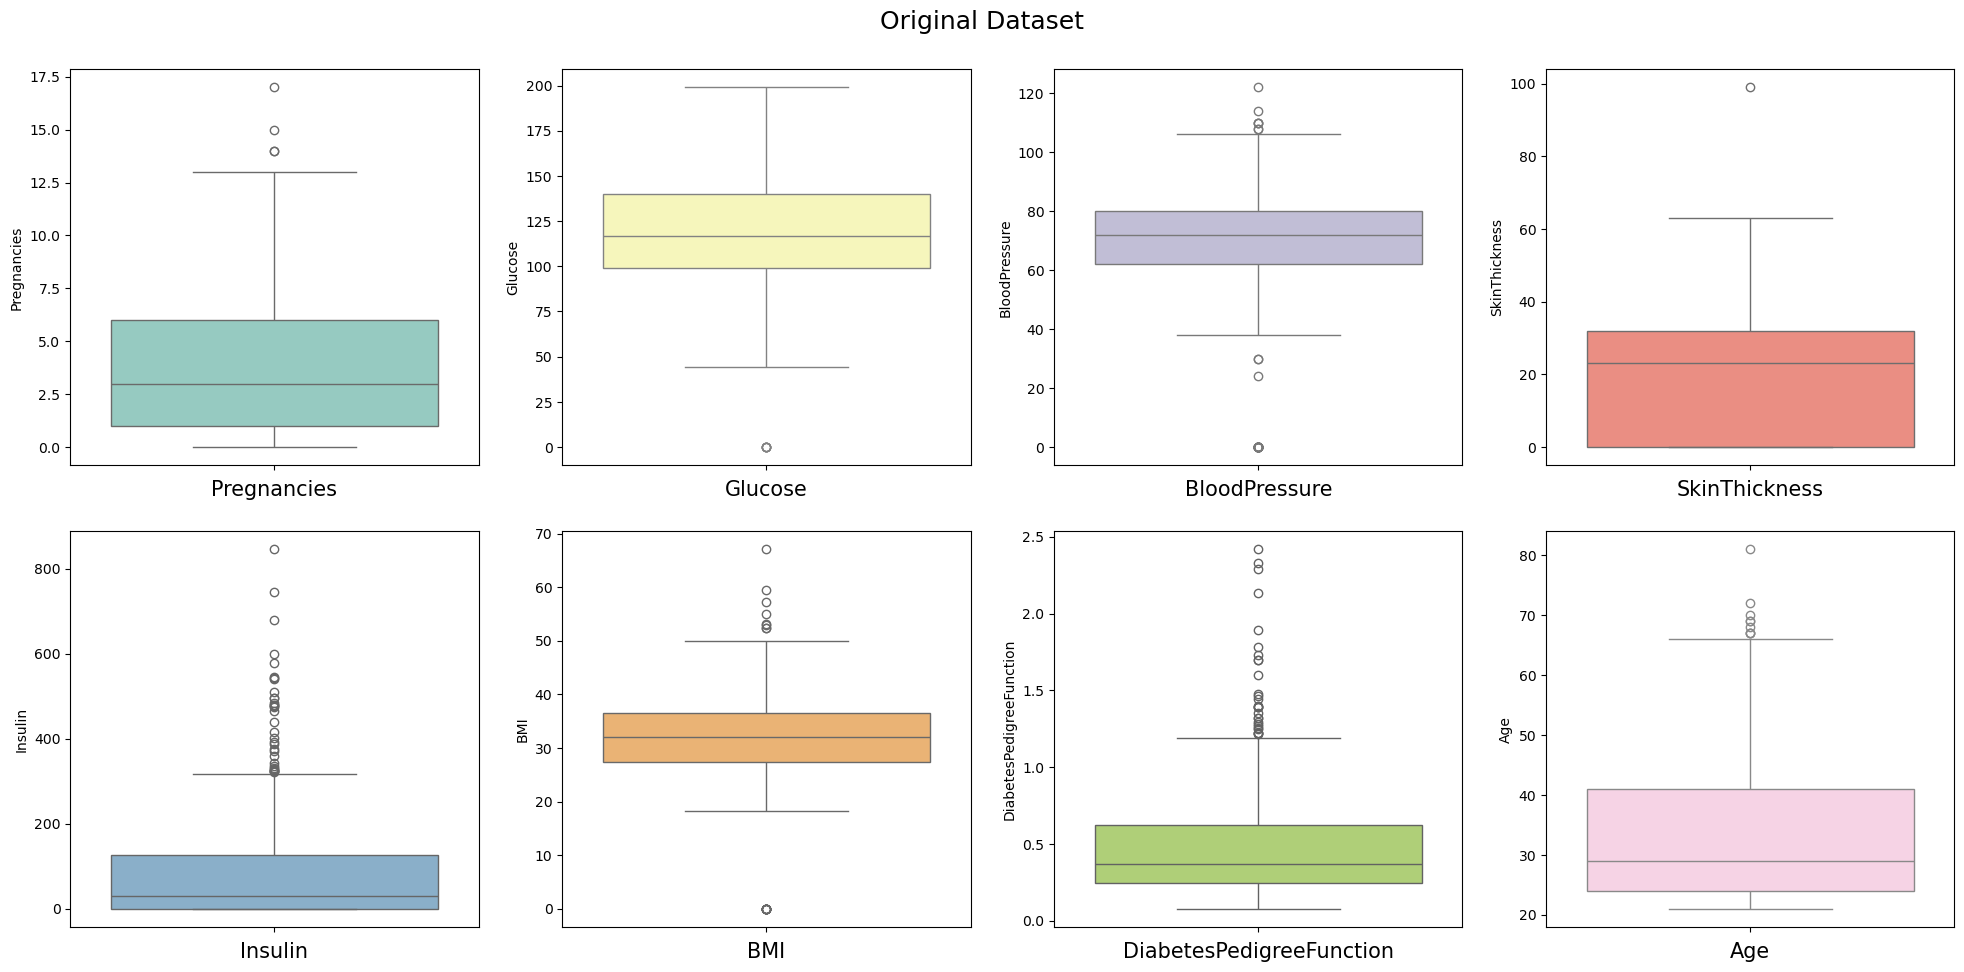

In [ ]:

boxplot_for_outliers(data,"original")

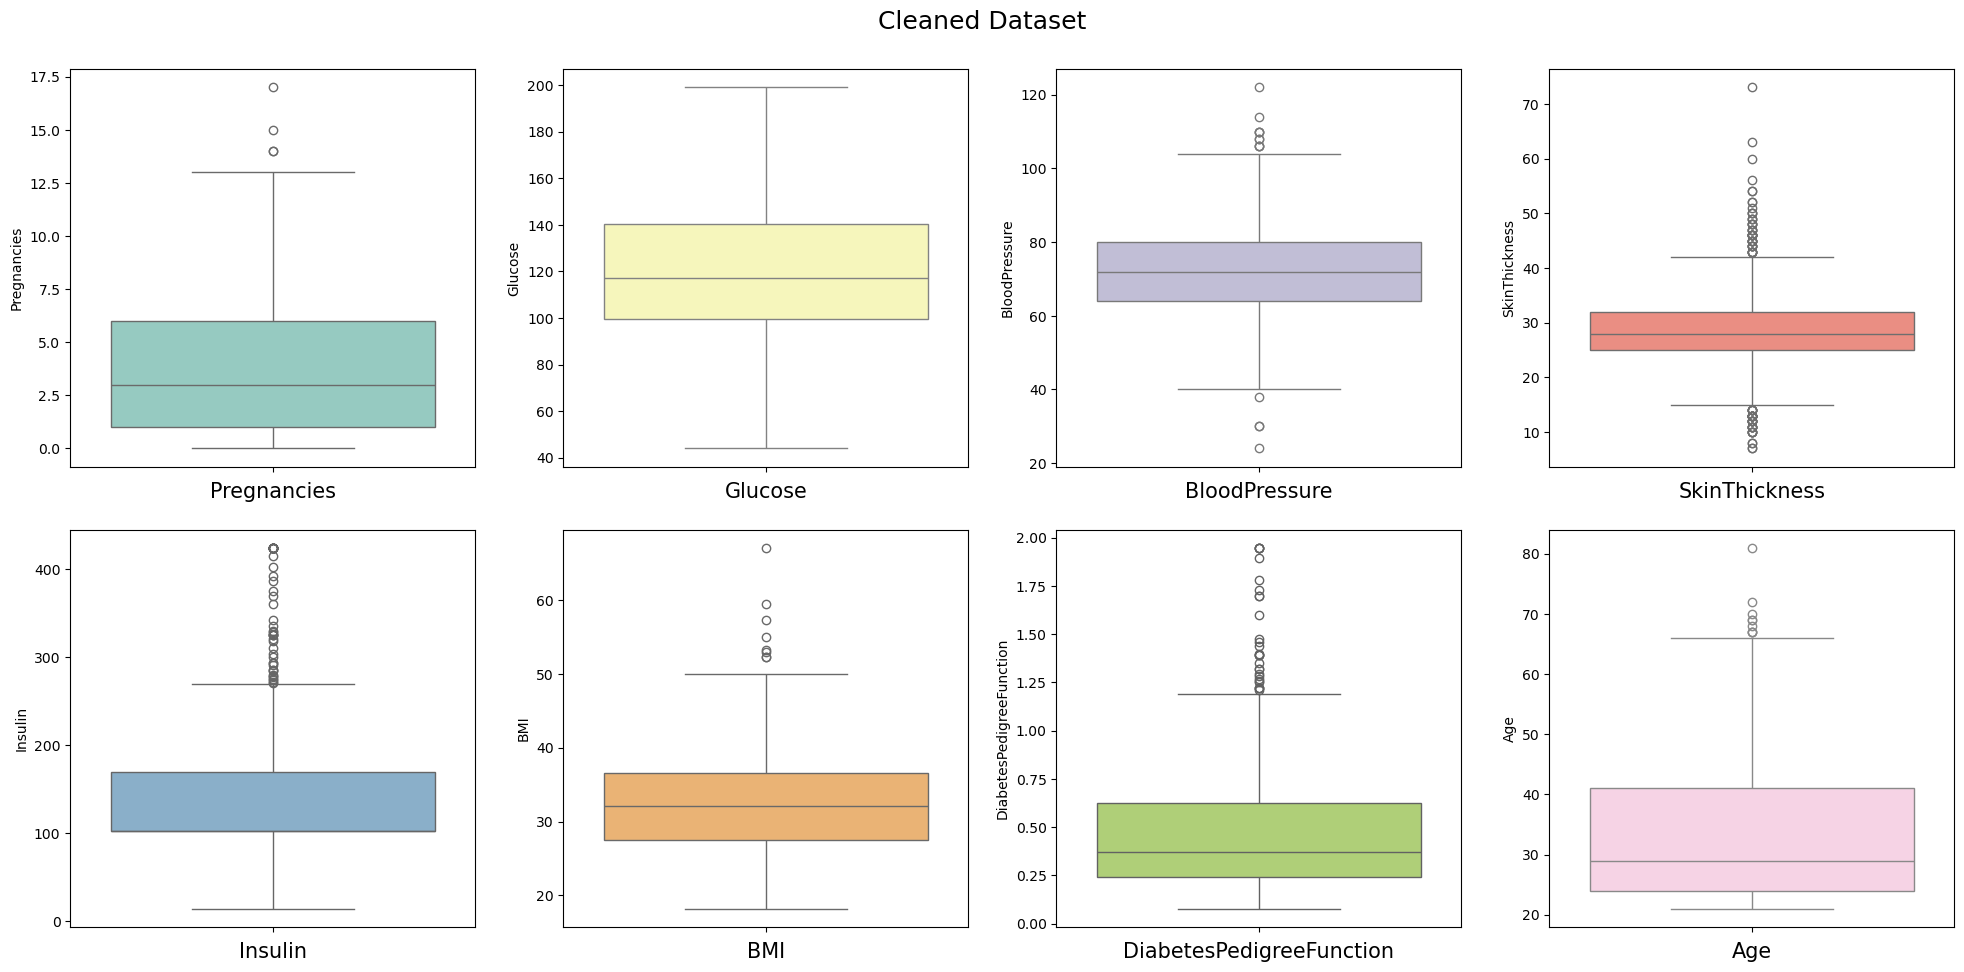

In [ ]:
boxplot_for_outliers(data_copied[num_cols],"copied_data")

In [ ]:
#distribution before and after imputing missing values
def hist_plot(data,title):
    a,b,c=4,2,1
    colors=[]
    missing_cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    plaette_set2=sns.color_palette("Paired",len(num_cols))
    for color in plaette_set2.as_hex():
        colors.append(color)
    color_num_cols2=zip(missing_cols,colors)
    for col ,color in color_num_cols2:
        plt.subplot(a,b,c)
        sns.histplot(data,x=col,kde=True,color=color)
        plt.xlabel(f"{data[col].name}",size=15)

        c+=1
        plt.suptitle(title,size=18)

    plt.tight_layout()
    plt.subplots_adjust(hspace=0.25)
    if title=="original_dataset":
        save_figure("oroginal_datset")
    else:
        save_figure("dataset_after imputing mising values")
    plt.show()

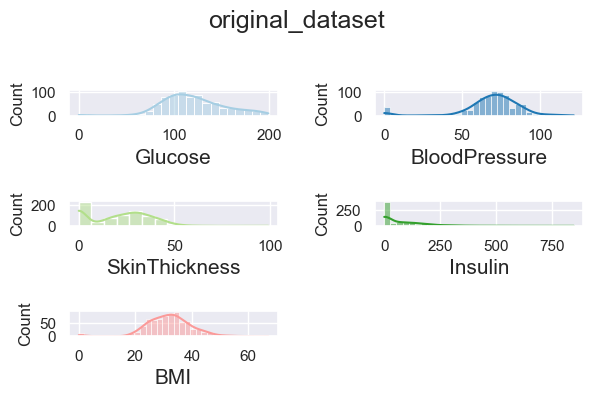

In [ ]:
hist_plot(data,title="original_dataset")

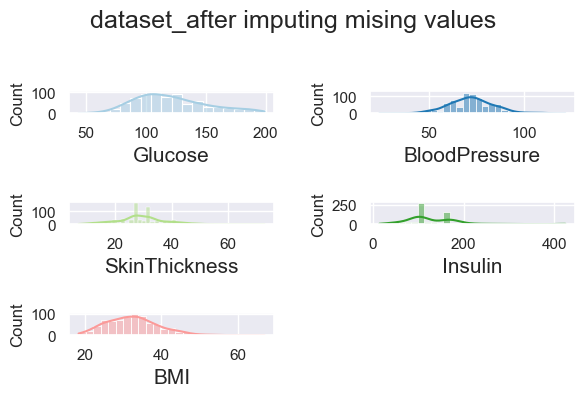

In [ ]:
hist_plot(data_copied,title="dataset_after imputing mising values ")

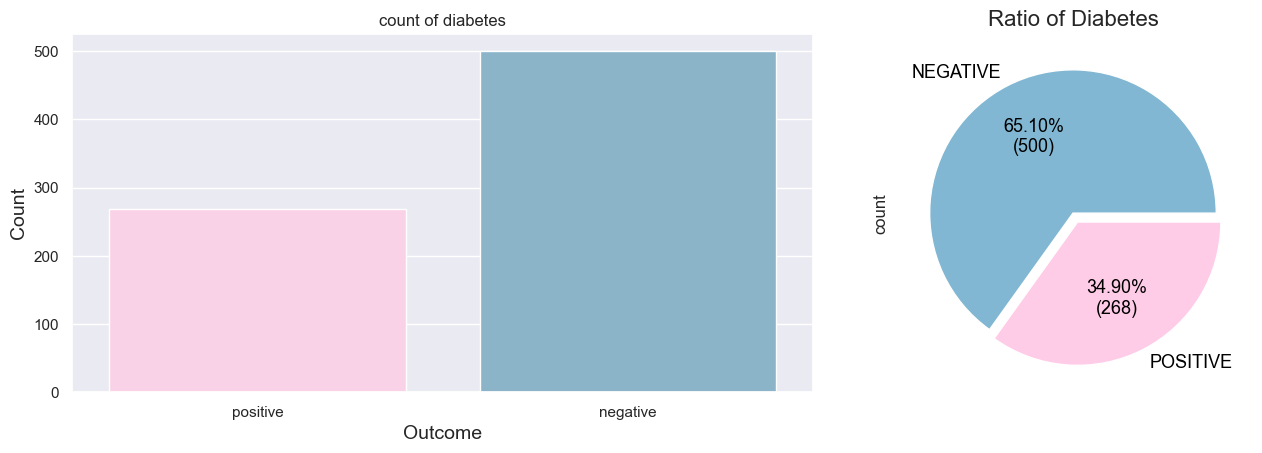

In [ ]:
# diabetes ratio
fig,axs=plt.subplots(1,2,figsize=(15,5))
ax=sns.countplot(data_copied,
                 x=data_copied["Outcome"].replace({0:'negative',1:'positive'}),
                 ax=axs[0],
                 palette=["#ffcce7", "#81b7d2"]);
ax.set_xlabel('Outcome', fontsize=14)
ax.set_ylabel('Count', fontsize=14)
axs[0].set_title("count of diabetes")
def func (pct,allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    return f"{pct:.2f}%\n({absolute:d})"
ax2=data_copied["Outcome"].value_counts().plot.pie(
    explode=[0,0.07],
    colors=["#81b7d2", "#ffcce7"],
    autopct=lambda pct: func(pct, data['Outcome'].value_counts()),
    labels=['NEGATIVE', 'POSITIVE'],
    ax = axs[1],
    textprops=dict(color="black", size=13));

axs[1].set_title("Ratio of Diabetes", fontsize=16)
plt.tight_layout()
save_figure("ratio of diabetes")
plt.show()


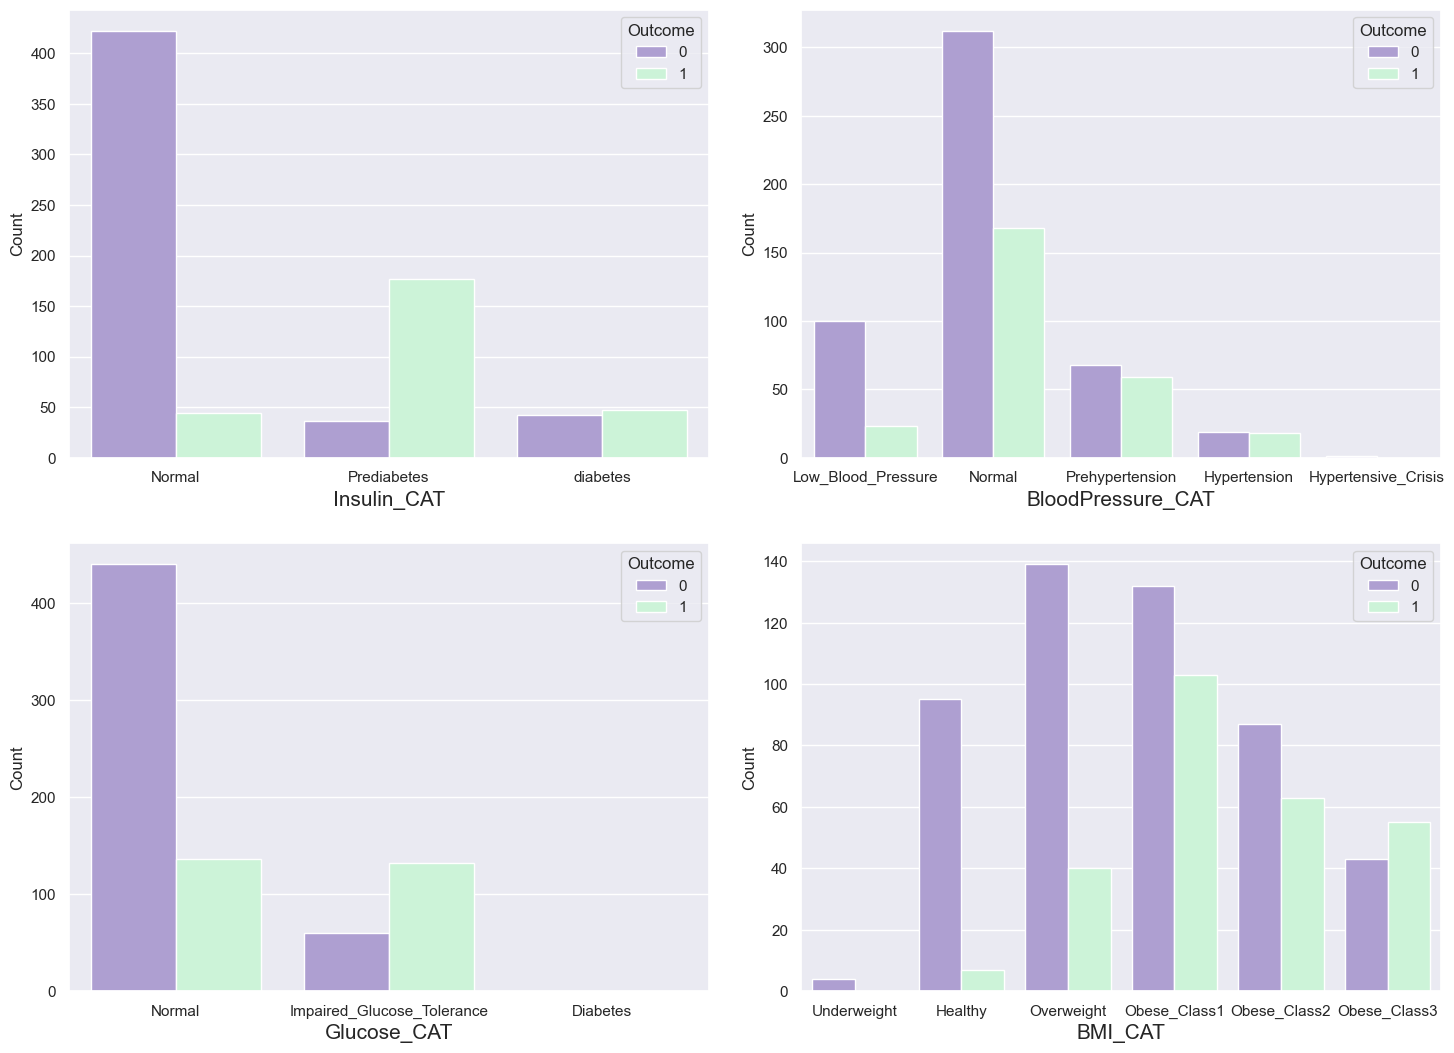

In [ ]:
# extracted features
new_cols= ["Insulin_CAT", "BloodPressure_CAT", "Glucose_CAT", "BMI_CAT"]
a,b,c=2,2,1
fig=plt.figure(figsize=(15,11))
for col in new_cols:
    plt.subplot(a,b,c)
    ax=sns.countplot(data_copied,
                       x=data_copied[col],
                       hue=data_copied.Outcome,
                       palette=["#AA96DA", "#C5FAD5"])
    plt.ylabel('Count')
    plt.xlabel(f'{col}', size=15)
    c += 1

plt.tight_layout()
plt.subplots_adjust(hspace=0.17)
save_figure("extracted_features")
plt.show()

In [ ]:
# PREPARE THE DATA FOR MACHINE LEARNING ALOGRITHMS

In [ ]:
#function for one hot encoder
# transform the cat features onto matrix
#drop first ==drop the first cat
def one_hot_encoder(data,cat_cols,drop_first=True):
    data=pd.get_dummies(data,columns=cat_cols,drop_first=drop_first)
    return data

In [ ]:
#function for label_encoder
# for any cat fetures with only two cat

def label_encoder(data,binary_col):
    labelencoder = LabelEncoder()
    data[binary_col]=labelencoder.fit_transform(data[binary_col])
    return data


In [ ]:


def data_prepare(x,y):
    index=x.index
    data=x.merge(y.to_frame(),left_index=True,right_index=True).set_index(index)
    cat_cols ,num_cols ,cat_but_car=info_features(data,print_result=False)
    [replace_with_thresholds(data,col) for col in num_cols]
    missing_value = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
    for col in missing_value:
        data[col] = np.where(data[col] == 0, np.nan, data[col])
    data = data.fillna(data.groupby('Outcome').transform('median'))
    feature_extraction(data)
    feature_scaling=RobustScaler()
    data[num_cols]=feature_scaling.fit_transform(data[num_cols])
    binary_cols=[col for col in data.columns
                if data[col].dtype not in ["int","float"]
                and data[col].nunique()==2]

    for col in binary_cols:
        label_encoder(data,col)

    ohe_cols=[col for col in data.columns
              if 12>=data[col].nunique()>2]
    data=one_hot_encoder(data,ohe_cols,drop_first=True)

    x = data.drop(["Outcome"], axis=1)
    y = data["Outcome"]
    return x,y


In [ ]:
# seprate the target from the features
# split the data into train and test sets

#unprocessed data
x = data.drop(["Outcome"], axis=1)
y = data["Outcome"]
X_train0, X_test0, y_train0, y_test0  = train_test_split(x, y, test_size=0.20, random_state=42)

In [ ]:
# 🚀 First take a look baseline scores of raw datasets.
# That's why I fit the models just before data preprocessing.

def base_model(x,y,scoring="roc_auc"):
    print("base models......")
    classifiers = [('LR', LogisticRegression()),
                   ('KNN', KNeighborsClassifier()),
                   ("CART", DecisionTreeClassifier()),
                   ("RF", RandomForestClassifier()),
                   ('GBM', GradientBoostingClassifier()),
                   ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
                   ('LightGBM', LGBMClassifier()),
                   #('CatBoost', CatBoostClassifier(verbose=False))
                   ]

    for name ,classifier in classifiers:
        cv_results=cross_validate(classifier,x,y,cv=3,scoring=scoring)
        print(f"{scoring}: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

base_model(X_train0, y_train0, scoring="accuracy")

base models......
accuracy: 0.7671 (LR) 
accuracy: 0.7182 (KNN) 
accuracy: 0.7215 (CART) 
accuracy: 0.7557 (RF) 
accuracy: 0.7622 (GBM) 
accuracy: 0.7524 (XGBoost) 
[LightGBM] [Info] Number of positive: 142, number of negative: 267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000066 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 409, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.347188 -> initscore=-0.631422
[LightGBM] [Info] Start training from score -0.631422
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

In [ ]:
# split the preprocesed data
X_train,y_train=data_prepare(X_train0,y_train0)
X_test,y_test=data_prepare(X_test0,y_test0)

In [ ]:
def base_models(X, y):
    print("preprocessed_data........")
    models = [("LR", LogisticRegression(solver='lbfgs', max_iter=3000)),
              ("KNN", KNeighborsClassifier()),
              ("CART", DecisionTreeClassifier()),
              ("RF", RandomForestClassifier()),
              ("GBM", GradientBoostingClassifier()),
              ("XGBoost", XGBClassifier(eval_metric='logloss')),
              ("LightGBM", LGBMClassifier())
              ]
    for name, classifier in models:
        cv_results = cross_validate(classifier, X, y, cv=5, scoring="accuracy")
        print(f"Accuracy: {round(cv_results['test_score'].mean(), 4)} ({name}) ")

In [ ]:
base_models(X_train,y_train)

preprocessed_data......
Accuracy: 0.8714 (LR) 
Accuracy: 0.8535 (KNN) 
Accuracy: 0.8338 (CART) 
Accuracy: 0.878 (RF) 
Accuracy: 0.8909 (GBM) 
Accuracy: 0.8893 (XGBoost) 
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000224 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

In [ ]:
# hyperparmeters ranges for all my models....
knn_params = {"n_neighbors": range(2, 50)}

cart_params = {'max_depth': range(1, 20),
               "min_samples_split": range(2, 30)}

rf_params = {"max_depth": [8, 15, None],
             "max_features": [5, 7],
             "min_samples_split": [15, 20],
             "n_estimators": [200, 300]}

xgboost_params = {"learning_rate": [0.1, 0.01],
                  "max_depth": [5, 8],
                  "n_estimators": [100, 200],
                  "colsample_bytree": [0.5, 1]}

lightgbm_params = {"learning_rate": [0.01, 0.1],
                   "n_estimators": [300, 500, 1500],
                   "colsample_bytree": [0.5, 0.7, 1]}

In [ ]:
classifiers  =[('KNN', KNeighborsClassifier(), knn_params),
               ("CART", DecisionTreeClassifier(), cart_params),
               ("RF", RandomForestClassifier(), rf_params),
               ('XGBoost', XGBClassifier(eval_metric='logloss'), xgboost_params),
               ('LightGBM', LGBMClassifier(), lightgbm_params)
             ]

In [ ]:
#hyperparameters_tuning
def hyperparameter_optimization(X, y, cv=5, scoring="accuracy"):
    print("\nHyperparameter Optimization....")
    best_models={}
    for name,classifier,params in classifiers:
        print(f"########## {name} ##########")
        cv_results = cross_validate(classifier, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (Before): {round(cv_results['test_score'].mean(), 4)}")
        gs_best = GridSearchCV(classifier, params, cv=cv, n_jobs=-1, verbose=False).fit(X, y)
        final_model = classifier.set_params(**gs_best.best_params_)

        cv_results = cross_validate(final_model, X, y, cv=cv, scoring=scoring)
        print(f"{scoring} (After): {round(cv_results['test_score'].mean(), 4)}")
        print(f"{name} best params: {gs_best.best_params_}", end="\n\n")
        best_models[name] = final_model
    return best_models


In [ ]:
def voting_classifier(best_models, X, y):
    print("\nVoting Classifier...")
    voting_clf = VotingClassifier(estimators=[('KNN', best_models["KNN"]),
                                              ('RF', best_models["RF"]),
                                              ('LightGBM', best_models["LightGBM"])],
                                  voting='soft').fit(X, y)
    cv_results = cross_validate(voting_clf, X, y, cv=3, scoring=["accuracy", "f1", "roc_auc"])
    print(f"Accuracy: {cv_results['test_accuracy'].mean()}")
    print(f"F1Score: {cv_results['test_f1'].mean()}")
    print(f"ROC_AUC: {cv_results['test_roc_auc'].mean()}")
    return voting_clf

In [ ]:
def fit_models(X,y):
    base_models(X, y)
    best_models = hyperparameter_optimization(X, y)
    voting_clf = voting_classifier(best_models, X, y)
    return voting_clf, best_models

voting_clf, best_models = fit_models(X_train, y_train)

Accuracy: 0.8714 (LR) 
Accuracy: 0.8535 (KNN) 
Accuracy: 0.8306 (CART) 
Accuracy: 0.8877 (RF) 
Accuracy: 0.8909 (GBM) 
Accuracy: 0.8893 (XGBoost) 
[LightGBM] [Info] Number of positive: 171, number of negative: 320
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000140 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 597
[LightGBM] [Info] Number of data points in the train set: 491, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348269 -> initscore=-0.626657
[LightGBM] [Info] Start training from score -0.626657
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

In [ ]:
best_models

{'KNN': KNeighborsClassifier(n_neighbors=11),
 'CART': DecisionTreeClassifier(max_depth=5, min_samples_split=5),
 'RF': RandomForestClassifier(max_features=5, min_samples_split=20, n_estimators=200),
 'XGBoost': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=0.5, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric='logloss',
               feature_types=None, feature_weights=None, gamma=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=8, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               multi_strategy=None, n_estimators=100, n_jobs=None,
               num_parallel_tree=None, ...),
 '

In [ ]:
lgbm_model = best_models['LightGBM'].fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 213, number of negative: 401
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000549 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 614, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.346906 -> initscore=-0.632669
[LightGBM] [Info] Start training from score -0.632669
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

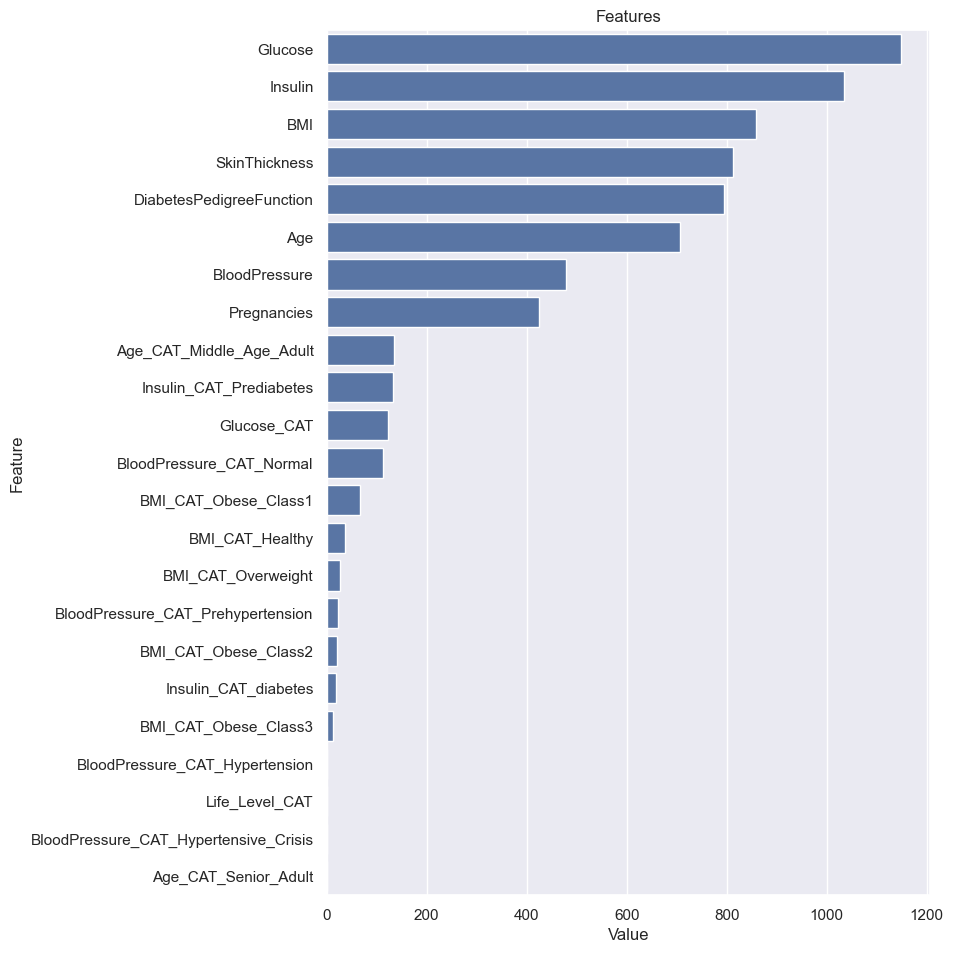

In [ ]:
def plot_importance(model, features, num=len(x)):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_,
                                'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    save_figure("feature_importantanc")
    plt.show()

plot_importance(lgbm_model, X_train)

In [ ]:
y_pred = lgbm_model.predict(X_test)
y_prob = lgbm_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90        99
           1       0.84      0.76      0.80        55

    accuracy                           0.86       154
   macro avg       0.86      0.84      0.85       154
weighted avg       0.86      0.86      0.86       154



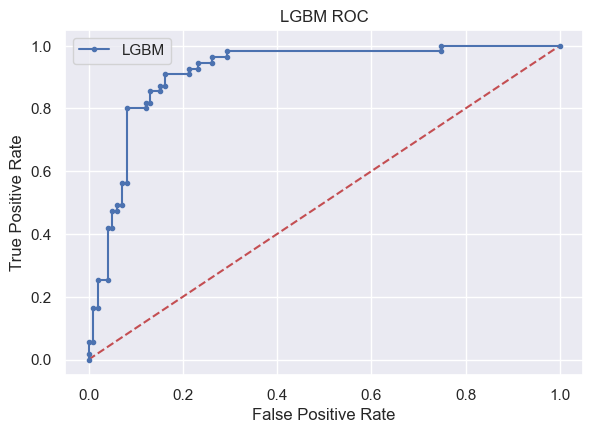

In [ ]:
lgbm_roc_auc = roc_auc_score(y_test, y_prob)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.figure()

plt.plot([0,1],[0,1],'r--')
plt.plot(fpr, tpr, marker='.', label='LGBM')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("LGBM ROC")
plt.legend()
save_figure("roc_auc_curve")
plt.show()

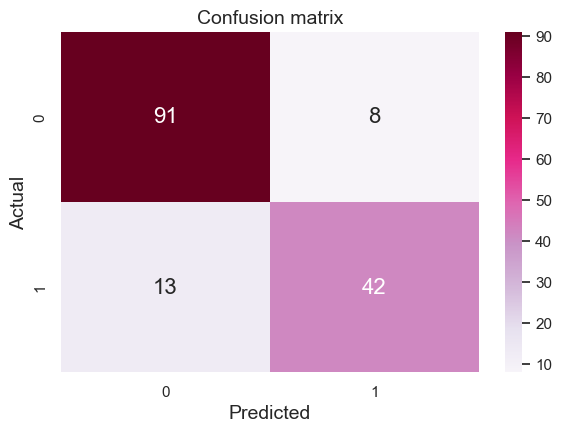

In [ ]:
cnf_matrix = confusion_matrix(y_test, y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),
                annot=True,
                cmap="PuRd",
                annot_kws={"size": 16})
plt.title('Confusion matrix', size=14)
plt.ylabel('Actual', size=14)
plt.xlabel('Predicted', size=14);
save_figure("confusion_matrix")
plt.show()

In [ ]:
#save the model
import joblib


joblib.dump(lgbm_model, "lgbm_model.pkl")




['lgbm_model.pkl']